# Business Problem Understanding

## Problem
Kepemilikan rumah adalah impian bagi banyak orang, namun proses jual beli properti tidaklah sederhana. Banyak faktor yang harus dipertimbangkan, termasuk harga pasar rumah di lingkungan tersebut. Mendapatkan rumah dengan harga yang sesuai atau terjangkau tentu menguntungkan bagi pembeli, namun bisa merugikan bagi penjual jika harga tersebut berada di bawah nilai pasar yang seharusnya. Sebaliknya, menetapkan harga jual yang terlalu tinggi dapat menunda proses transaksi karena pembeli mungkin akan berpikir dua kali sebelum membeli. Oleh karena itu, memahami harga pasar rumah di suatu area sangat penting sebelum membuat keputusan untuk menjual atau membeli properti.

Tujuan
Memprediksi harga rumah di California dengan mempertimbangkan kawasan perumahan di sekitarnya.

## Analytical approach
- Lingkungan:
Population
Households
Housing Median Age
Median Income

- Kondisi rumah:
Longitude
Latitude
Ocean Proximity
Total Rooms
Total Bedrooms

## Metric eval
Metrik evaluasi yang akan diterapkan mencakup RMSE, MAE, dan MAPE, di mana RMSE adalah akar kuadrat dari rata-rata kuadrat kesalahan, MAE merupakan rata-rata dari nilai absolut kesalahan, sedangkan MAPE menunjukkan rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi harga sewa berdasarkan fitur yang digunakan.

Selain itu, jika model yang dipilih sebagai model akhir adalah model linear, kita dapat menggunakan nilai R-squared atau adj. R-squared. R-squared berfungsi untuk mengukur seberapa baik model menjelaskan variasi dalam data. Semakin mendekati nilai 1, semakin baik model tersebut sesuai dengan data observasi. Namun, metrik ini tidak berlaku untuk model non-linear.

# Data Understanding

In [369]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [370]:
df = pd.read_csv('data_california_house.csv')

In [371]:
display(df.head(),df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [373]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [374]:
df_model = df.copy()

<Axes: xlabel='ocean_proximity', ylabel='count'>

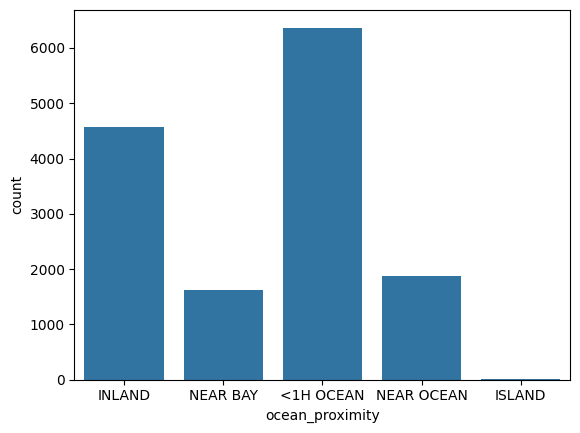

In [375]:
sns.countplot(data=df_model,x='ocean_proximity')

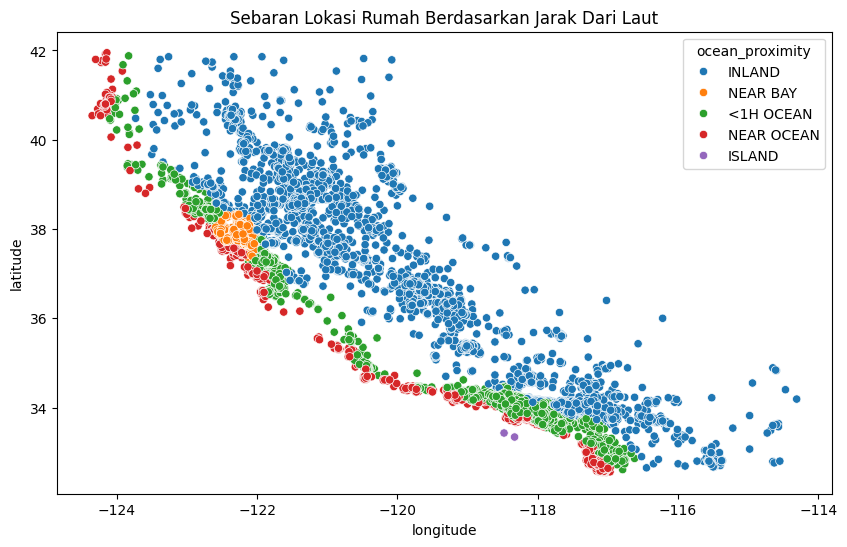

In [376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', data=df).set_title('Sebaran Lokasi Rumah Berdasarkan Jarak Dari Laut')
plt.show()

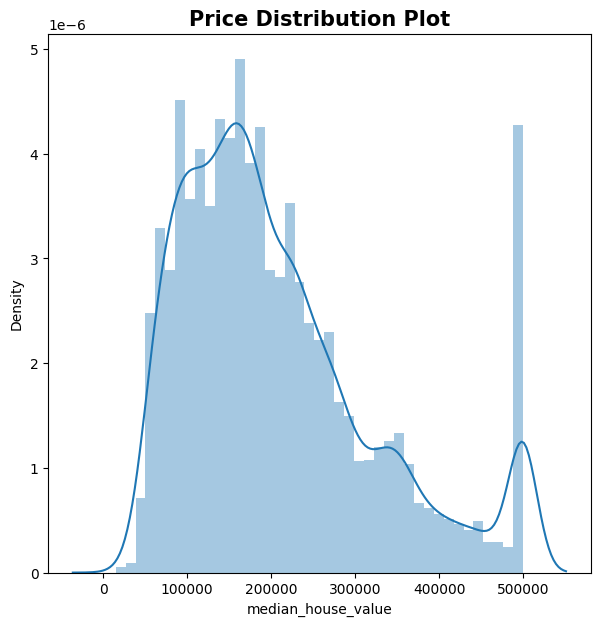

In [377]:
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Price Distribution Plot', size=15, weight='bold');

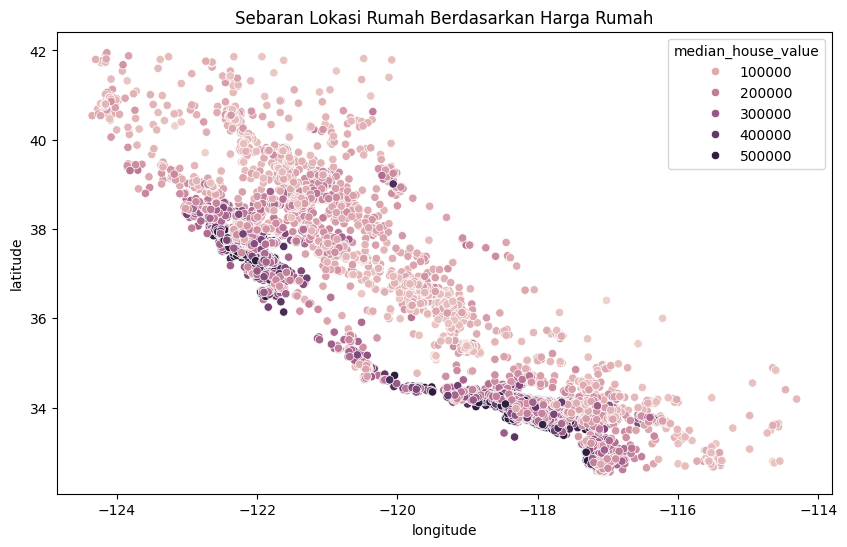

In [378]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df).set_title('Sebaran Lokasi Rumah Berdasarkan Harga Rumah')
plt.show()

## Data Prepocessing

In [379]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-122.0, -121.19]"
1,latitude,float64,0,0.00,836,"[36.74, 37.92]"
2,housing_median_age,float64,0,0.00,52,"[37.0, 11.0]"
3,total_rooms,float64,0,0.00,5227,"[3089.0, 985.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1182.0, 1571.0]"
5,population,float64,0,0.00,3498,"[1919.0, 1062.0]"
6,households,float64,0,0.00,1649,"[203.0, 445.0]"
7,median_income,float64,0,0.00,9797,"[7.8164, 5.7415]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, INLAND]"
9,median_house_value,float64,0,0.00,3548,"[291000.0, 269200.0]"


In [380]:
df_model.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [381]:
imputer = SimpleImputer(strategy='median')
df_model['total_bedrooms'] = imputer.fit_transform(df_model[['total_bedrooms']])

In [382]:
df_model.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [383]:
df_model.duplicated().sum()

0

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

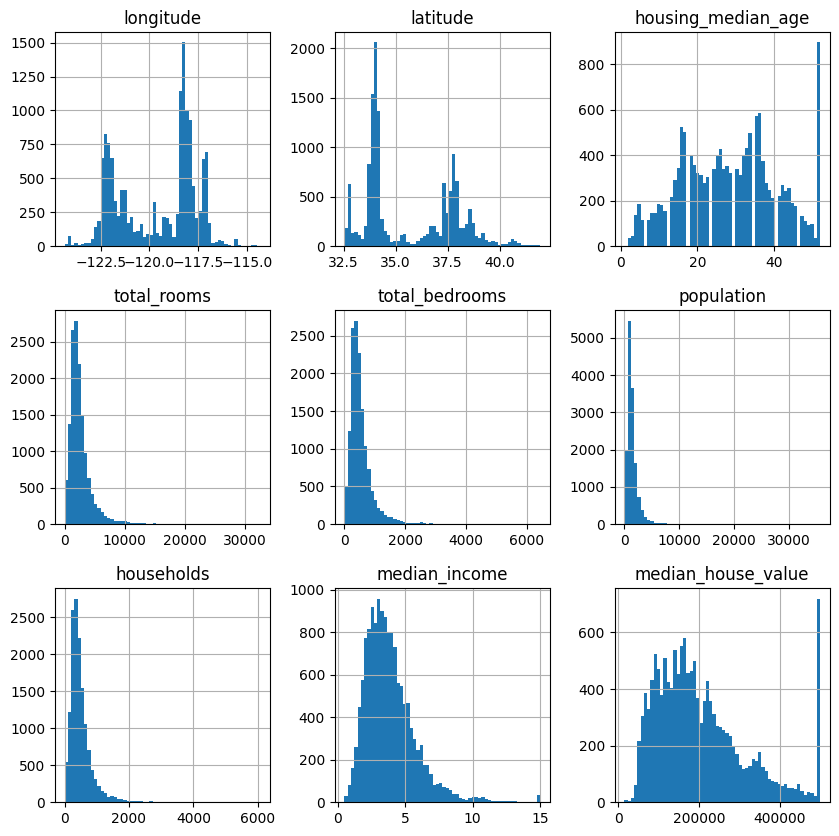

In [384]:
df_model.hist(bins=60,figsize=(10,10))

In [385]:
df_model.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

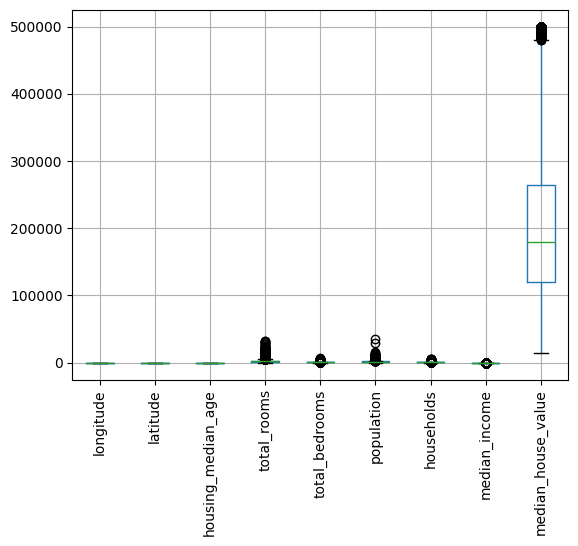

In [386]:
df_model.boxplot(rot=90);

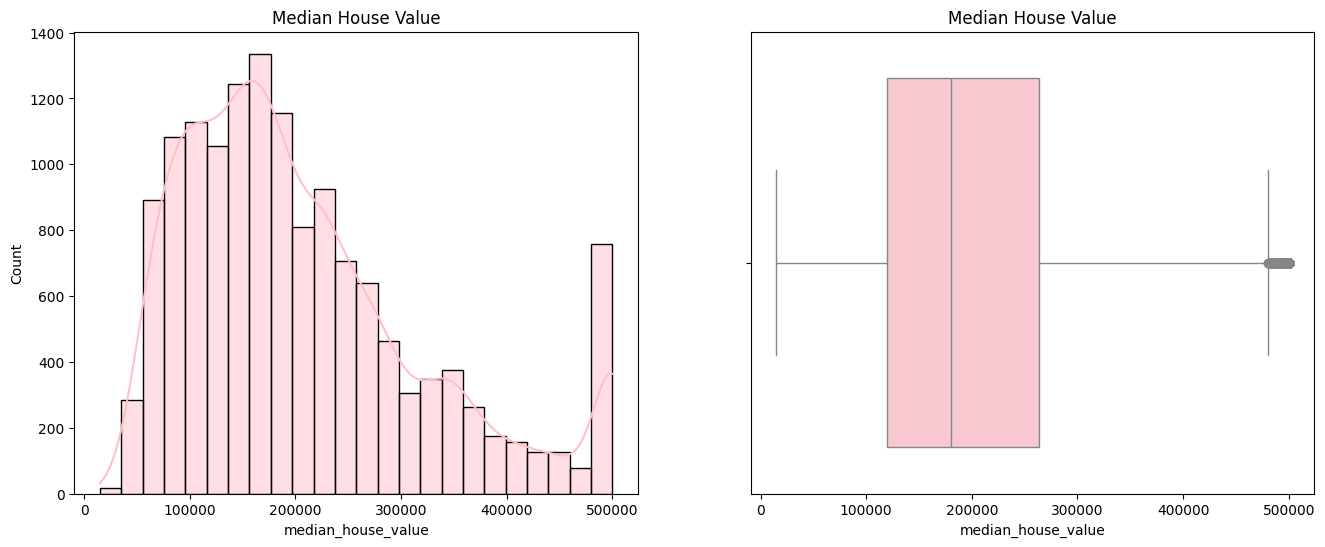

In [387]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df_model['median_house_value'],binwidth=20000,kde=True,color='pink')
plt.title('Median House Value')

plt.subplot(1,2,2)
sns.boxplot(x= df_model['median_house_value'],color='pink')
plt.title('Median House Value')

plt.show()

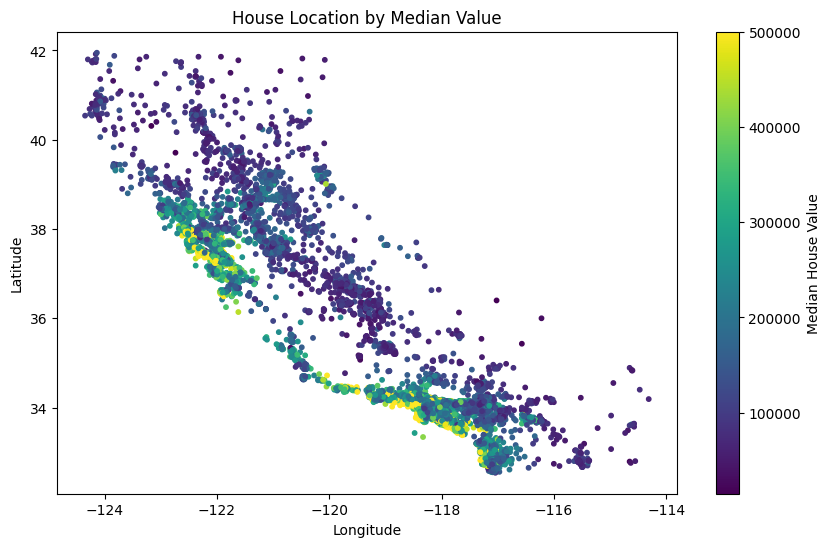

In [388]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Replace df_model with your DataFrame
plt.figure(figsize=(10, 6))

# Normalize the color scale
norm = plt.Normalize(df_model['median_house_value'].min(), df_model['median_house_value'].max())
colors = plt.cm.viridis

# Scatter plot
scatter = plt.scatter(df_model['longitude'], df_model['latitude'], 
                      c=df_model['median_house_value'], cmap=colors, 
                      norm=norm, s=10)

# Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

# Title and labels
plt.title("House Location by Median Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


## Data filtering

In [389]:
def calculate_anomaly(data):
    quartiles = data.quantile([0.25, 0.75])
    lower_quartile, upper_quartile = quartiles.iloc[0], quartiles.iloc[1]
    interquartile_range = upper_quartile - lower_quartile
    threshold = 1.5 * interquartile_range
    
    print(f'IQR: {interquartile_range}')
    
    lower_limit = lower_quartile - threshold
    upper_limit = upper_quartile + threshold
    print(f'Lower Limit: {lower_limit}')
    print(f'Upper Limit: {upper_limit}')

### median house value

In [390]:
calculate_anomaly(df_model['median_house_value'])

IQR: 144300.0
Lower Limit: -96850.0
Upper Limit: 480350.0


In [391]:
df_model['median_house_value'].describe()

count     14448.000000
mean     206824.624516
std      115365.476182
min       14999.000000
25%      119600.000000
50%      180000.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [392]:
df_model[df_model['median_house_value']>=480000]['median_house_value'].value_counts().head()

median_house_value
500001.0    678
500000.0     18
483300.0      6
485000.0      2
491200.0      2
Name: count, dtype: int64

In [393]:
df_model = df_model.drop(df_model[df_model['median_house_value']==500001.0].index)  
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


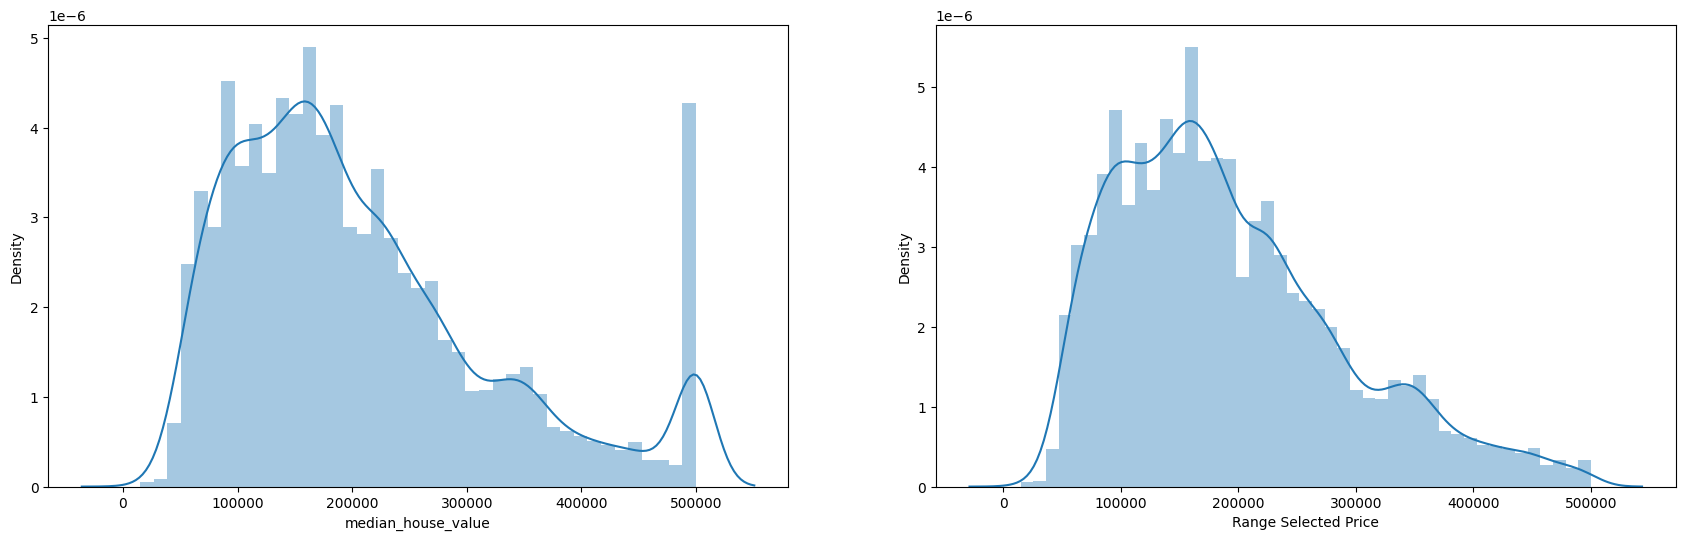

In [394]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected Price');

### ocean proximity

In [395]:
df_model['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5998
INLAND        4561
NEAR OCEAN    1732
NEAR BAY      1477
ISLAND           2
Name: count, dtype: int64

In [396]:
df_model = df_model[df_model['ocean_proximity'] != 'ISLAND']
df_model['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5998
INLAND        4561
NEAR OCEAN    1732
NEAR BAY      1477
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

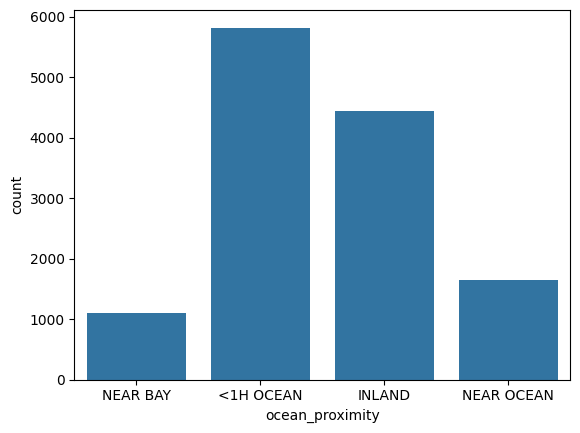

In [426]:
sns.countplot(data=df_model,x='ocean_proximity')

### housing median age

In [397]:
calculate_anomaly(df_model['housing_median_age'])

IQR: 19.0
Lower Limit: -10.5
Upper Limit: 65.5


In [398]:
df_model['housing_median_age'].describe()

count    13768.000000
mean        28.354300
std         12.503637
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [399]:
df_model[df_model['housing_median_age']>=45]['housing_median_age'].value_counts().head()

housing_median_age
52.0    769
45.0    180
46.0    170
47.0    126
48.0    106
Name: count, dtype: int64

In [400]:
df_model = df_model.drop(df_model[df_model['housing_median_age']==52.0].index)  
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


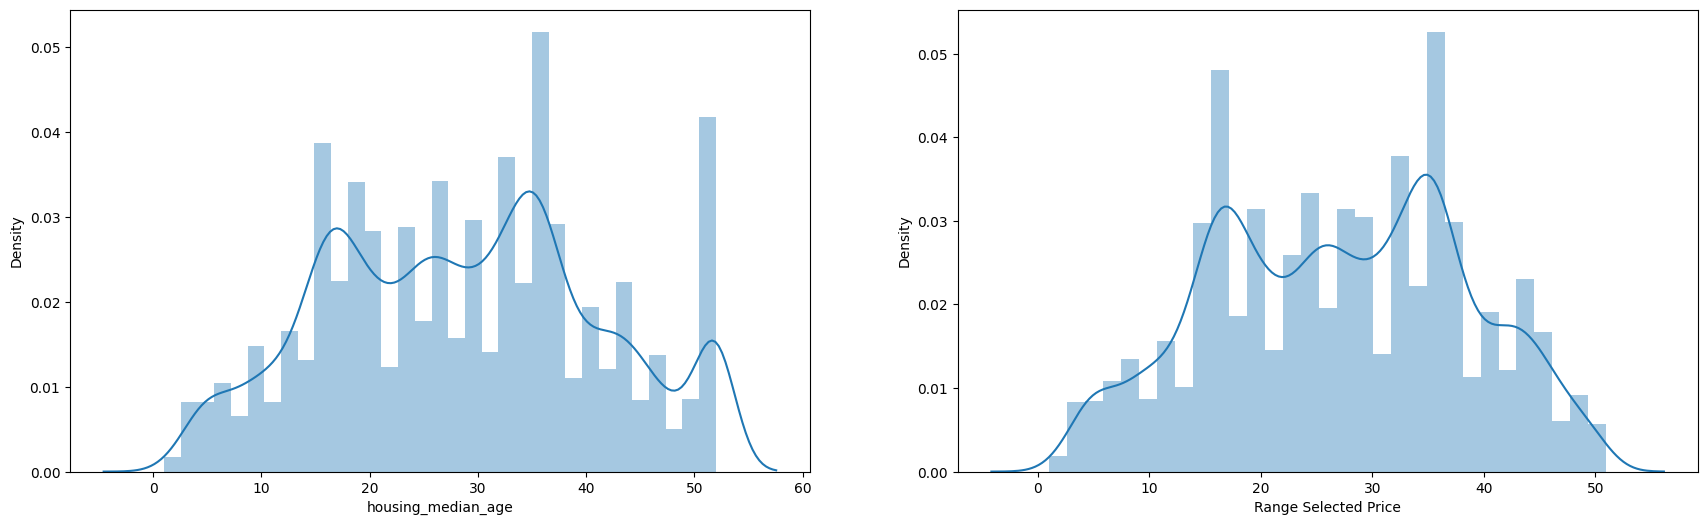

In [427]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['housing_median_age'], ax=axes[0])
sns.distplot(df_model['housing_median_age'], ax=axes[1])
axes[0].set_xlabel('housing_median_age')
axes[1].set_xlabel('Range Selected Price');

In [401]:
df_model.reset_index(drop=True,inplace=True)
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,-119.475125,35.585714,26.955458,2673.110855,547.810601,1469.896838,509.084237,3.689585,189608.554273
std,1.980034,2.149509,11.426044,2230.562764,431.286069,1180.582721,391.666945,1.561195,95758.365558
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.530000,33.920000,17.000000,1458.000000,300.000000,808.000000,283.000000,2.542900,115650.000000
50%,-118.440000,34.240000,27.000000,2143.000000,438.000000,1203.000000,416.000000,3.475000,171600.000000
75%,-117.970000,37.670000,36.000000,3184.000000,657.000000,1778.500000,615.000000,4.606300,243100.000000
max,-114.310000,41.950000,51.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


# Modeling

In [402]:
df_model.shape

(12999, 10)

### Dataset spliting

In [403]:
X = df_model.drop(columns=['median_house_value'])
y = df_model['median_house_value']

In [404]:
X_train, X_val, y_train, y_val= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

### Dataset Transform

In [405]:
transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
], remainder='passthrough')


In [406]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [407]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
1,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
2,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
3,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
4,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
12994,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
12995,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
12996,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
12997,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [408]:
# algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling 
scaler = StandardScaler()

# Kandidat 
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-59659.26735398 -67092.72179997 -61588.64626938 -61802.32181236
 -64343.36517049] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41907.73093199 -41339.14862805 -41904.27654426 -42490.74313979
 -44816.90587128] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.2339521  -0.23434756 -0.23980629 -0.24550612 -0.25348487] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-56948.85651332 -55613.59454817 -55821.8948455  -55918.16565008
 -60404.58470751] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38761.43650031 -38203.26888969 -38016.43092938 -38029.92321836
 -40668.74564889] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


[-0.21068235 -0.2142584  -0.20919529 -0.21463041 -0.22730516] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-67750.02658367 -63341.34714578 -68382.03446347 -60846.28488754
 -65230.47003343] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-45571.37417582 -42477.30769231 -45899.01098901 -41379.89010989
 -43620.50687191] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-0.26148553 -0.24970513 -0.25851852 -0.23980611 -0.2486787 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-47567.04791367 -44979.21975256 -48309.28429493 -45795.67291881
 -51299.86717634] TransformedTargetRegressor(func=<ufunc 

In [409]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-62897.264481,2572.511449,-42491.761023,1218.281092,-0.241419,0.007357
1,KNN Regressor,-56941.419253,1792.041939,-38735.961037,1003.621368,-0.215214,0.006391
2,DecisionTree Regressor,-65110.032623,2792.771469,-43789.617968,1742.511938,-0.251639,0.007705
3,RandomForest Regressor,-47590.218411,2205.302433,-31405.124237,962.516836,-0.176183,0.006125
4,XGBoost Regressor,-45971.522876,1789.192068,-30082.628636,937.235597,-0.169935,0.005908


In [410]:
from sklearn.model_selection import cross_validate

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


linreg_pipe = Pipeline([('transformer', transformer), ('linreg', log_lr)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', log_knn)])
dt_pipe = Pipeline([('transformer', transformer), ('dt', log_dt)]) 
rf_pipe = Pipeline([('transformer', transformer), ('rf', log_rf)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', log_xgb)])

metric = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',]

def model_evaluation(model, metric):
    model_cv = cross_validate(model, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=1), scoring = metric, return_train_score=True)
    return model_cv

linreg_pipe_cv_score = model_evaluation(linreg_pipe, metric)
knn_pipe_cv_score = model_evaluation(knn_pipe, metric)
dt_pipe_cv_score = model_evaluation (dt_pipe, metric)
rf_pipe_cv_score = model_evaluation(rf_pipe, metric)
xgb_pipe_cv_score = model_evaluation(xgb_pipe, metric)

In [411]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

models = {
    'RandomForest': RandomForestRegressor(random_state=10),
    'XGBoost': XGBRegressor(random_state=10,objective ='reg:squarederror'),
    'KNN' : KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []
score_rmsle = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmsle.append(mean_squared_log_error(y_test, y_pred, squared=False))


skormodel = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'RMSLE': score_rmsle}, index=models.keys())
skormodel

,RMSE,MAE,MAPE,RMSLE
RandomForest,45155.721237,30732.486831,0.179753,0.235001
XGBoost,43282.980924,29672.901438,0.173249,0.230049
KNN,54253.846634,37631.584872,0.214412,0.276988


In [412]:
xgb = XGBRegressor(random_state=10)
score_rmse = []
score_mae = []
score_mape = []
score_rmsle = []

# Prediksi pada test set
xgbbench = Pipeline([
  ('preprocessing', transformer),
  ('scaler', scaler),
  ('model', rf)
])

xgbbench.fit(X_train, y_train)
y_pred = xgbbench.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_rmsle.append(mean_squared_log_error(y_test, y_pred,squared=False))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

#skor r square sebelum tuning
xgbbench.score(X_test,y_test)

0.7811493221880164

Melalui XGB Boost, hasil r square sebelum tuning menunjukkan sebesar 0.7811493221880164 atau dapat mewakili 78% keseluruhan data

### Tuning

In [413]:
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [414]:
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [415]:
# Fitting data training
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsamp...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [416]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44280.661390760404
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


### prediction

In [417]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
ytuning = xgb_tuning.predict(X_val)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_val, ytuning))
mae_xgb_tuning = mean_absolute_error(y_val, ytuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_val, ytuning)

skortuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
skortuning

,RMSE,MAE,MAPE
XGB,42041.175114,28711.268369,0.167397


In [418]:
xgb_tuning.score(X_test,y_test)

0.8102462529149299

Melalui XGB Boost, hasil r square setelah tuning menunjukkan sebesar 0.8102462529149299 atau dapat mewakili 81% keseluruhan data

### Performance comparison

In [424]:
pd.DataFrame(skormodel.loc['XGBoost']).T

,RMSE,MAE,MAPE,RMSLE
XGBoost,43282.980924,29672.901438,0.173249,0.230049


In [420]:
skortuning

,RMSE,MAE,MAPE
XGB,42041.175114,28711.268369,0.167397


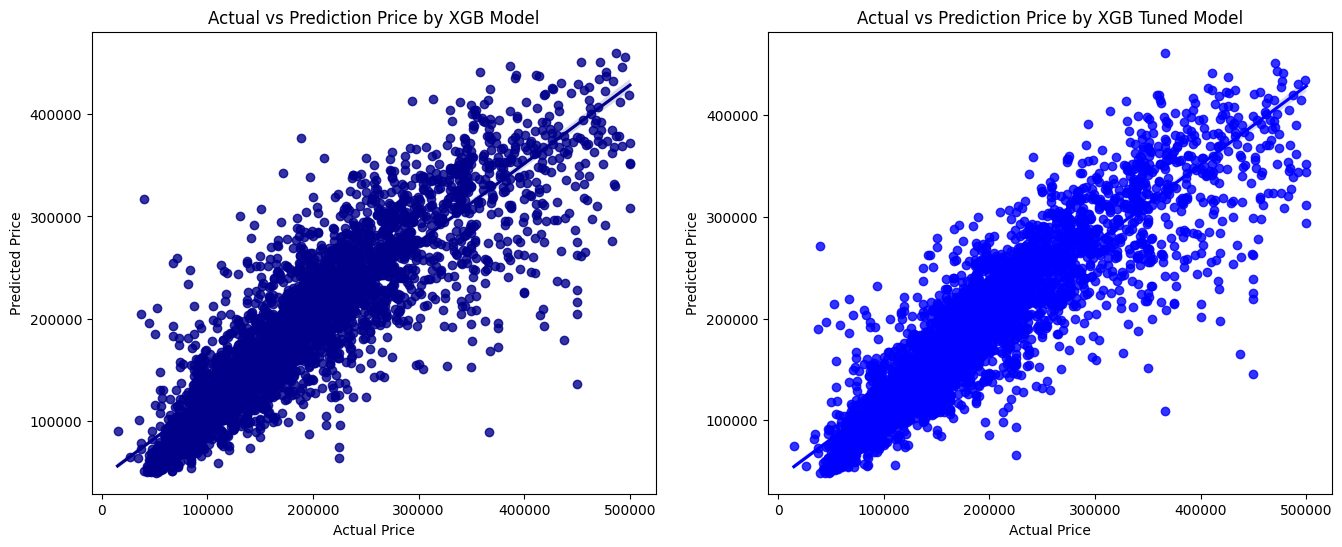

In [421]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred,color='darkblue')
plt.title('Actual vs Prediction Price by XGB Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=ytuning,color='blue')
plt.title('Actual vs Prediction Price by XGB Tuned Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

### Feature

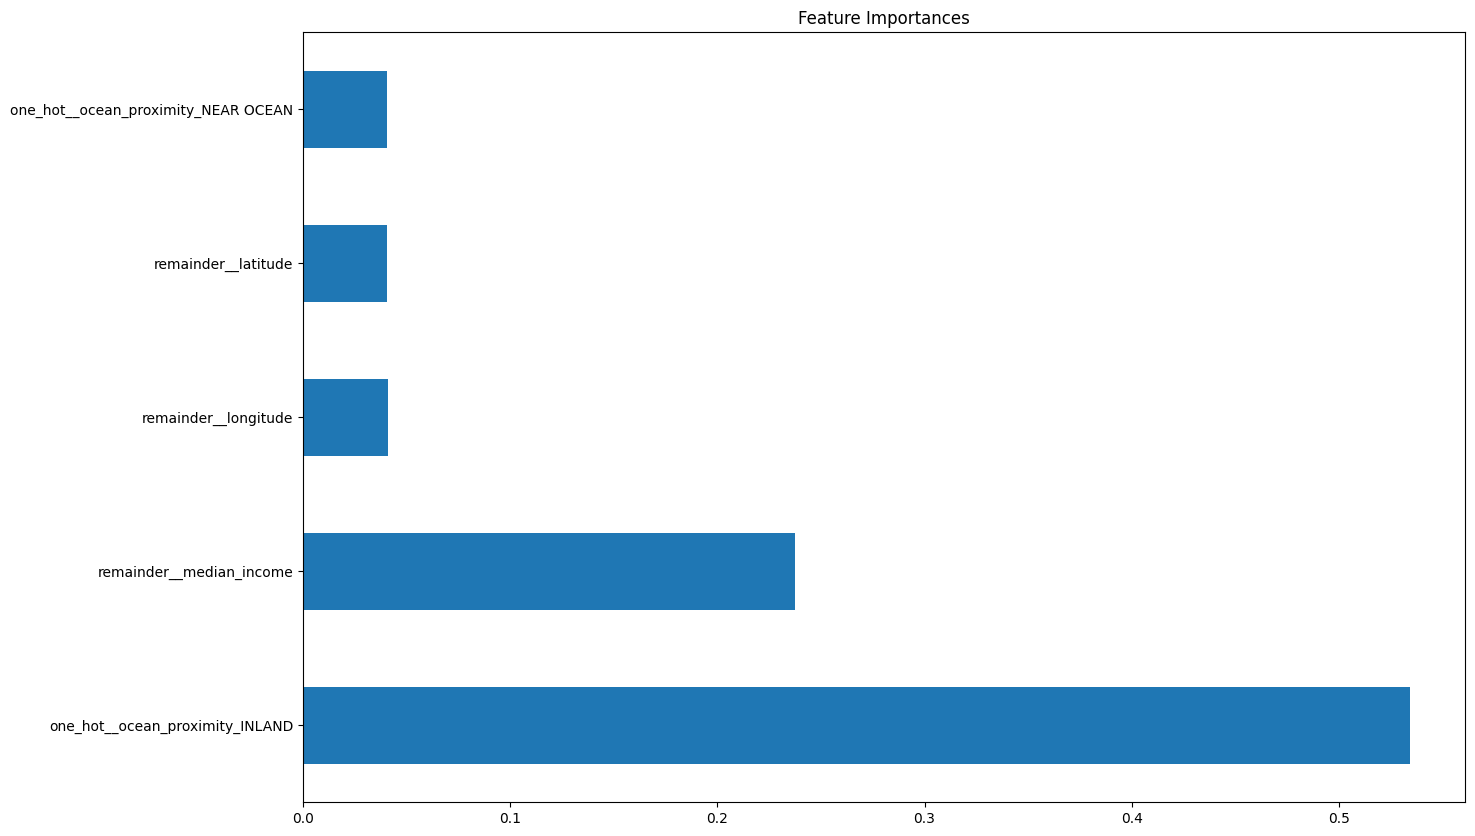

In [422]:
feature_imp = pd.Series(random_xgb.best_estimator_['model'].feature_importances_, transformer.get_feature_names_out ()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances', figsize=(15,10));

# Conclusion

Fitur importance:

Berikut ini adalah dua fitur yang memiliki pengaruh terbesar terhadap prediksi nilai rumah: one_hot__ocean_proximity_INLAND dan remainder__median_income dari grafik "Feature Importances". Diperhatikan bahwa pengaruh fitur ocean_proximity_INLAND sangat besar dibandingkan dengan median_income.

Dari analisis ini, bisa disimpulkan bahwa sejauh mana lokasi rumahnya (terutama jika rumah itu ada di pedalaman) dan tingkat pendapatannya merupakan faktor yang penting dalam menentukan harga rumah.

Evaluasi Model:

Ada satu hal yang perlu dicatat tentang RMSE – yaitu nilainya 42041.175 yang cukup tinggi. Ini mungkin disebabkan oleh adanya outlier dalam data atau skala data yang besar karena secara umum mempengaruhi metrik RMSE.

Namun, keberadaan MAPE hanya 16.74% membuktikan, model ini memiliki kemampuan prediksi wajar sebagai kesalahan rata-rata merupakan hanya sekitar 16.74% daripada nilai aktual tertentu di kategori “Good Forecast.”

Akibatnya, akurasi model (yang menggunakan metrik score pada kasus ini) cukup baik menghasilkan nilai 0.81 atau 81%, sehingga menunjukkan bahwa model tersebut dapat melakukan prediksi dengan tingkat ketepatan yang cukup tinggi.

Sebuah kesimpulan ditarik dari analisis ini, yaitu; lokasi (khususnya proximity ke laut atau di pedalaman) dan level pendapatan di wilayah


# Recommendations

Penambahan Fitur yang Relevan:

Untuk meningkatkan keakuratan model, ada baiknya menambahkan fitur yang berhubungan langsung dengan harga rumah. Misalnya, bisa ditambahkan fitur luas tanah dan bangunan; fasilitas rumah seperti kolam renang, garasi, taman dan sebagainya; serta nama perusahaan properti sebagai salah satu faktor penting yang mempengaruhi harga. Sebagai akibat dari hal ini, model tersebut akan mampu menangkap lebih banyak variasi dalam variabel tergantung pada harga properti.

Pembaruan Data:

Data yang digunakan dalam model saat ini adalah data dari tahun 1990 yang mungkin tidak lagi relevan dengan kondisi pasar saat ini. Adanya faktor-faktor seperti inflasi, perubahan demografi dan perkembangan ekonomi telah membuat data itu menjadi kurang akurat untuk prediksi masa kini. Oleh karena itu sangat disarankan untuk memperbaharui set data melalui penggunaan data-data terkini agar dapat mencerminkan kondisi pasar nyata saat ini.

Peningkatan Metodologi Pemodelan:

Pada sisi pemodelan, ada beberapa teknik optimasi hyperparameter yang lebih maju yang dapat membantu meningkatkan performa model. Ada juga kemungkinan Model Gridsearch yang mencoba semua kombinasi hyperparameter menjadi lebih optimal daripada Randomized Search yang hanya mencoba perpaduan acak. Dalam hal ini, GridSearch mempunyai kelebihan dalam memberikan pemahaman komprehensif tentang bagaimana setiap kombinasi hyperparamater pengaruh performa model meskipun dengan biaya komputasi yang tinggi.

Aplikasi dan Batasan Model:

Model ini dapat digunakan untuk memprediksi harga rumah dengan jenis fitur seperti dataset California housing terutama jika ada tambahan fitur. Harus diingat bahwa model ini memiliki hasil yang konstan antara pelatihan dan pengujian data artinya tidak signifikan terpengaruh oleh overfitting atau underfitting.

Namun, sangat penting untuk mempertimbangkan bahwa model ini dilatih pada data harga rumah dari tahun 1990. Prediksi model bisa menjadi biased jika harga rumah sekarang jauh berbeda dengan harga saat itu terutama jika rentang harganya diluar dari kisaran data pelatihan. Oleh karena itu, kehati-hatian diperlukan ketika menggunakan model ini untuk prediksi harga di masa